# Malignant Comments Classifier Project

###### Problem Statement

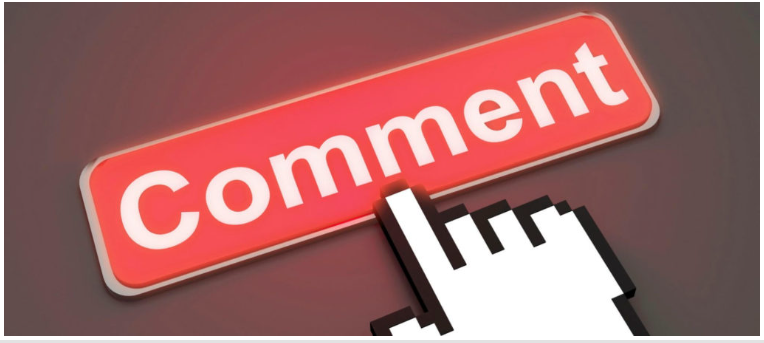

The proliferation of social media enables people to express their opinions widely online. However, at the same time, this has resulted in the emergence of conflict and hate, making online environments uninviting for users. Although researchers have found that hate is a problem across multiple platforms, there is a lack of models for online hate detection.

Online hate, described as abusive language, aggression, cyberbullying, hatefulness and many others has been identified as a major threat on online social media platforms. Social media platforms are the most prominent grounds for such toxic behaviour.   

There has been a remarkable increase in the cases of cyberbullying and trolls on various social media platforms. Many celebrities and influences are facing backlashes from people and have to come across hateful and offensive comments. This can take a toll on anyone and affect them mentally leading to depression, mental illness, self-hatred and suicidal thoughts.

Internet comments are bastions of hatred and vitriol. While online anonymity has provided a new outlet for aggression and hate speech, machine learning can be used to fight it. The problem we sought to solve was the tagging of internet comments that are aggressive towards other users. This means that insults to third parties such as celebrities will be tagged as unoffensive, but “u are an idiot” is clearly offensive.

Our goal is to build a prototype of online hate and abuse comment classifier which can used to classify hate and offensive comments so that it can be controlled and restricted from spreading hatred and cyberbullying. 


### Import All Needed Libraries

In [38]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno


#import warning library
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore')

#import NLP libraries
import nltk
nltk.download('stopwords', quiet=True)
nltk.download('punkt', quiet=True)
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from nltk.tokenize import word_tokenize, regexp_tokenize

from scipy import interp
import scikitplot as skplt
from itertools import cycle
import matplotlib.ticker as plticker
import joblib

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from scipy.sparse import csr_matrix

import timeit, sys
from sklearn import metrics
from skmultilearn.problem_transform import BinaryRelevance
import tqdm.notebook as tqdm
from sklearn.svm import SVC, LinearSVC
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB
from sklearn.ensemble import AdaBoostClassifier, BaggingClassifier, RandomForestClassifier
from sklearn.metrics import hamming_loss, log_loss, accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc, roc_auc_score, multilabel_confusion_matrix
from scikitplot.metrics import plot_roc_curve

In [2]:
#load the train dataset
df=pd.read_csv('train.csv')

In [3]:
#display top 5 rows
df.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [4]:
#check the shape of dataset
df.shape

(159571, 8)

In [5]:
#display all variables in dataset
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

###### About Columns:-

-	Malignant: It is the Label column, which includes values 0 and 1, denoting if the comment is malignant or not. 
-	Highly Malignant: It denotes comments that are highly malignant and hurtful. 
-	Rude: It denotes comments that are very rude and offensive.
-	Threat: It contains indication of the comments that are giving any threat to someone. 	
-	Abuse: It is for comments that are abusive in nature. 
-	Loathe: It describes the comments which are hateful and loathing in nature.  
-	ID: It includes unique Ids associated with each comment text given.   
-	Comment text: This column contains the comments extracted from various social media platforms. 


## Exploratory Data Analysis

In [6]:
print('we have {} rows and {} columns in dataframe.'.format(df.shape[0],df.shape[1]))
df.head(10)

we have 159571 rows and 8 columns in dataframe.


,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0


In [7]:
#check the missing values in dataset
df.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

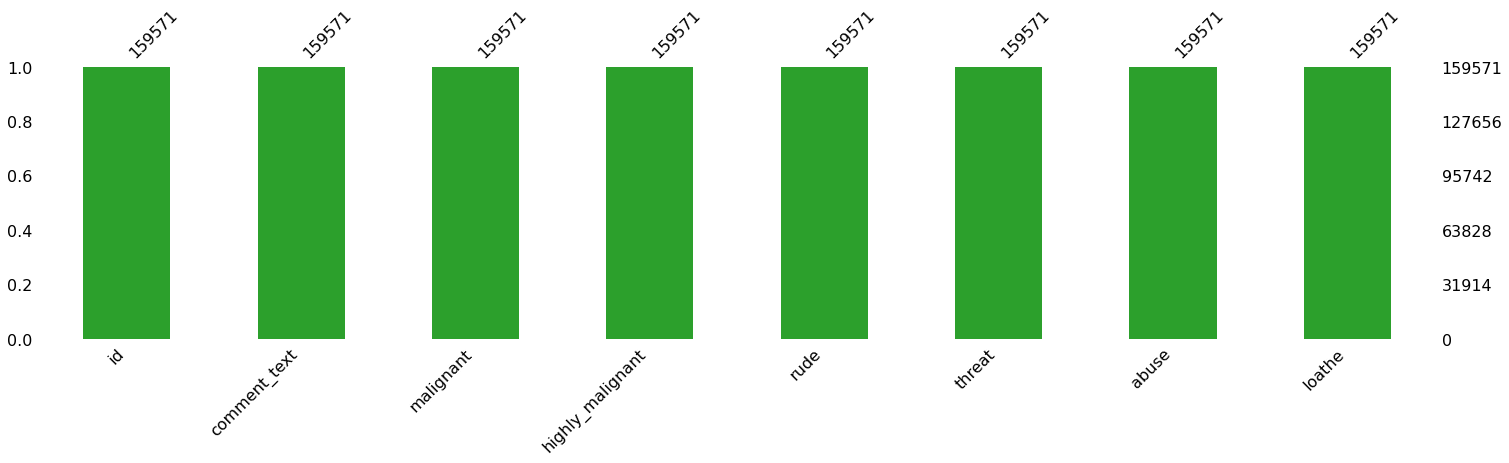

In [8]:
missingno.bar(df,figsize=(25,5),color='tab:green');

In [9]:
#checking the information of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [10]:
# checking ratio of data which contains malignant comments and normal or unoffensive comments.
output_labels=df.columns[2:]

# counting non-zero rows i.e. Malignant Comments
malignant_comments=len(df[df[output_labels].any(axis=1)])

# counting rows containing zero i.e. Normal Comments
normal_comments=len(df)-malignant_comments

#Check the % of malignant comments and normal comments
print(f'Malignant Comments : {malignant_comments} ({round(malignant_comments*100/len(df),2)}%)')
print(f'Normal Comments : {normal_comments} ({round(normal_comments*100/len(df),2)}%)')

Malignant Comments : 16225 (10.17%)
Normal Comments : 143346 (89.83%)


In [11]:
#copy the dataframe
df1=df.copy()

In [12]:
#create column with original length the length of comments
df1['original_length']=df.comment_text.str.len()

#display the dataset
df1.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,67


In [13]:
# Data Cleansing

# as the feature 'id' has no relevance w.r.t. model training I am dropping this column
df1.drop('id',inplace=True,axis=1)

In [14]:
#converting comments in lowercase format
df1['comment_text']=df1.comment_text.str.lower()
df1.head()

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,explanation\nwhy the edits made under my usern...,0,0,0,0,0,0,264
1,d'aww! he matches this background colour i'm s...,0,0,0,0,0,0,112
2,"hey man, i'm really not trying to edit war. it...",0,0,0,0,0,0,233
3,"""\nmore\ni can't make any real suggestions on ...",0,0,0,0,0,0,622
4,"you, sir, are my hero. any chance you remember...",0,0,0,0,0,0,67


In [15]:
# Removing and Replacing unwanted characters in the comment_text column

#replaceing '\n' with ' '
df1.comment_text=df1.comment_text.str.replace('\n',' ')

# Keeping only text with letters a to z, 0 to 9 and words like can't, don't, couldn't etc
df1.comment_text=df1.comment_text.apply(lambda x:' '.join(regexp_tokenize(x,"[a-z']+")))

#removing stop words and Punctuations

# Getting the list of stop words of english language as set
stop_words=set(stopwords.words('english'))

# Updating the stop_words set by adding letters from a to z
for ch in range(ord('a'),ord('z')+1):
    stop_words.update(chr(ch))
    
# Updating stop_words further by adding some custom words
custom_words = ("d'aww","mr","hmm","umm","also","maybe","that's","he's","she's","i'll","he'll","she'll","us",
                "ok","there's","hey","heh","hi","oh","bbq","i'm","i've","nt","can't","could","ur","re","ve",
                "rofl","lol","stfu","lmk","ily","yolo","smh","lmfao","nvm","ikr","ofc","omg","ilu")
stop_words.update(custom_words)

# Checking the new list of stop words
print("New list of custom stop words are as follows:\n")
print(stop_words)

New list of custom stop words are as follows:

{'b', 'omg', "needn't", 'above', 'smh', 'z', 'up', 'shouldn', 'this', 'yours', 'yourselves', 'can', "that'll", 'to', 'oh', 'that', 'or', 'won', 'by', 'didn', 'if', 'ain', "shan't", 'd', 'why', 'out', 'are', "she'll", "won't", 'again', 'hmm', 'too', 'ily', 'could', 'his', 'other', 'the', 'she', 'nor', 'been', 'were', 'those', "should've", 'our', 'q', 'do', 'more', 'during', "there's", 'some', 'as', 'hers', 'most', 'very', 'both', 'off', 'himself', 'with', "shouldn't", 'her', 'about', 'them', 've', "didn't", 'j', "you're", 'a', 'all', 'of', 'its', 'not', "that's", 'over', 'their', 'because', 'any', "mustn't", 'umm', 'does', 'through', 'against', 'but', "isn't", 'such', 'was', 'c', 'so', 're', "i'll", "it's", 'on', 'there', 'same', 'ours', 'hasn', 'him', "i'm", "weren't", 'once', 'what', 'h', 'also', 'bbq', 'me', 'ourselves', 'ur', 'which', 'u', 'under', 'your', "d'aww", 'o', 'it', 'we', 'here', 'hadn', 'themselves', 'hi', 'at', 'in', 'and', 

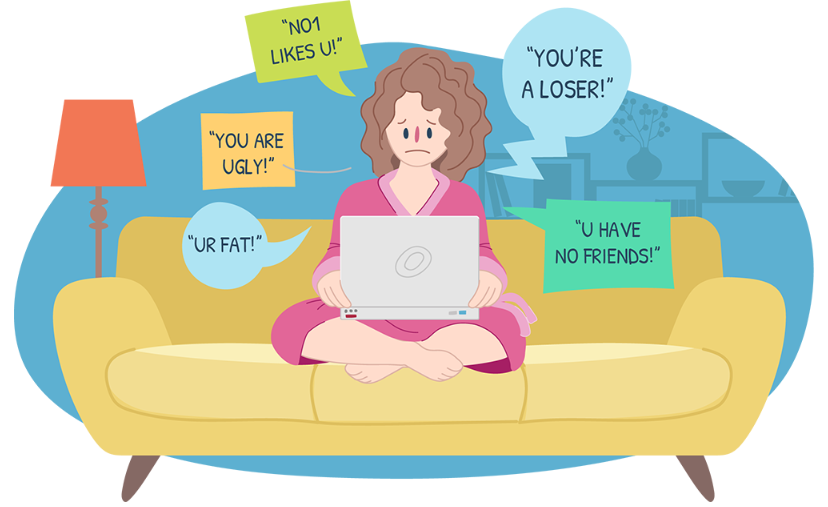

In [16]:
# Removing stop words
df1.comment_text=df1.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words))

# Removing punctuations
df1.comment_text=df1.comment_text.replace("[^\w\d\s]","")

#display dataset
df1.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264
1,matches background colour seemingly stuck than...,0,0,0,0,0,0,112
2,man really trying edit war guy constantly remo...,0,0,0,0,0,0,233
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622
4,sir hero chance remember page,0,0,0,0,0,0,67
5,congratulations well use tools well talk,0,0,0,0,0,0,65
6,cocksucker piss around work,1,1,1,0,1,0,44
7,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,115
8,sorry word 'nonsense' offensive anyway intendi...,0,0,0,0,0,0,472
9,alignment subject contrary dulithgow,0,0,0,0,0,0,70


In [17]:
# Checking the length of comment_text after cleaning and storing it in cleaned_length variable
df1["cleaned_length"] = df1.comment_text.str.len()

# Taking a loot at first 10 rows of data
df1.head(10)

,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,original_length,cleaned_length
0,explanation edits made username hardcore metal...,0,0,0,0,0,0,264,158
1,matches background colour seemingly stuck than...,0,0,0,0,0,0,112,65
2,man really trying edit war guy constantly remo...,0,0,0,0,0,0,233,137
3,make real suggestions improvement wondered sec...,0,0,0,0,0,0,622,374
4,sir hero chance remember page,0,0,0,0,0,0,67,29
5,congratulations well use tools well talk,0,0,0,0,0,0,65,40
6,cocksucker piss around work,1,1,1,0,1,0,44,27
7,vandalism matt shirvington article reverted pl...,0,0,0,0,0,0,115,57
8,sorry word 'nonsense' offensive anyway intendi...,0,0,0,0,0,0,472,283
9,alignment subject contrary dulithgow,0,0,0,0,0,0,70,36


In [18]:
# Now checking the percentage of length cleaned
print(f"Total Original Length        : {df1.original_length.sum()}")
print(f"Total Cleaned Length         : {df1.cleaned_length.sum()}")
print(f"Percentage of Length Cleaned : {(df1.original_length.sum()-df1.cleaned_length.sum())*100/df1.original_length.sum()}%")

Total Original Length        : 62893130
Total Cleaned Length         : 39214065
Percentage of Length Cleaned : 37.64968447269201%


### Visualization

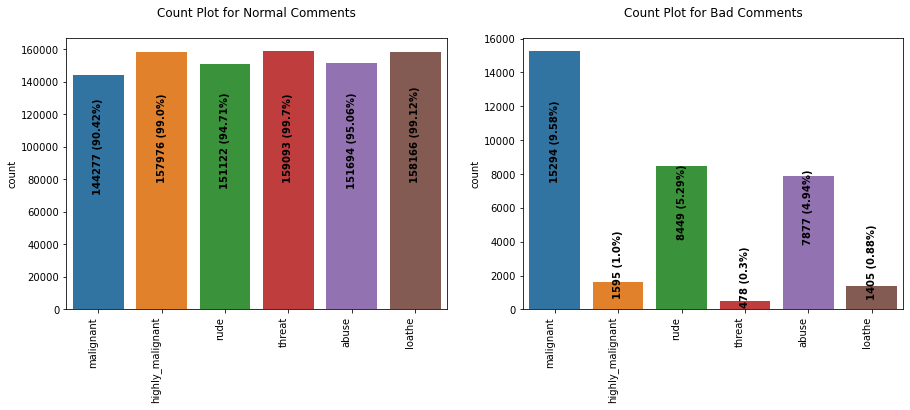

In [19]:
# comparing normal comments and bad comments using count plot

fig, ax = plt.subplots(1,2,figsize=(15,5))

for i in range(2):
    sns.countplot(data=df1[output_labels][df1[output_labels]==i], ax=ax[i])
    if i == 0:
        ax[i].set_title("Count Plot for Normal Comments\n")
    else:
        ax[i].set_title("Count Plot for Bad Comments\n")
        
    ax[i].set_xticklabels(output_labels, rotation=90, ha="right")
    p=0
    for prop in ax[i].patches:
        count = prop.get_height()
        s = f"{count} ({round(count*100/len(df1),2)}%)"
        ax[i].text(p,count/2,s,rotation=90, ha="center", fontweight="bold")
        p += 1

plt.show()

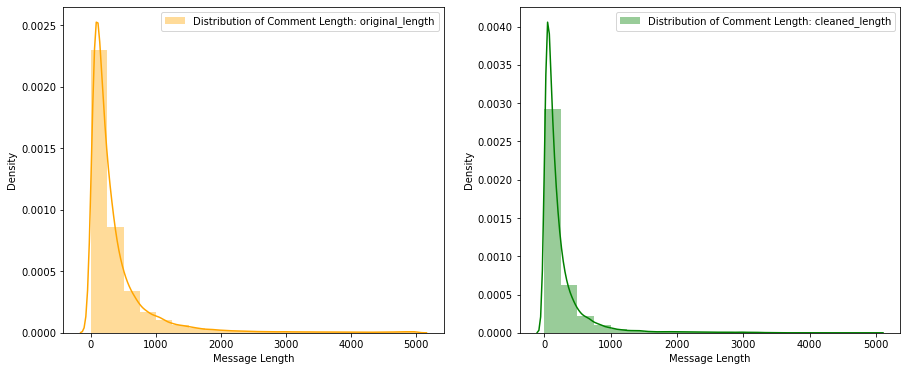

In [20]:
# Comparing the comment text length distribution before cleaning and after cleaning

fig, ax = plt.subplots(1,2,figsize=(15,6))
j=0
colors = ['orange','green']
for i in df1.columns[-2:]:
    label_text = f"Distribution of Comment Length: {i}"
    sns.distplot(df1[i],ax=ax[j],bins=20,color=colors[j],label=label_text)
    ax[j].set_xlabel("Message Length")
    ax[j].legend()
    j += 1
    
plt.show()

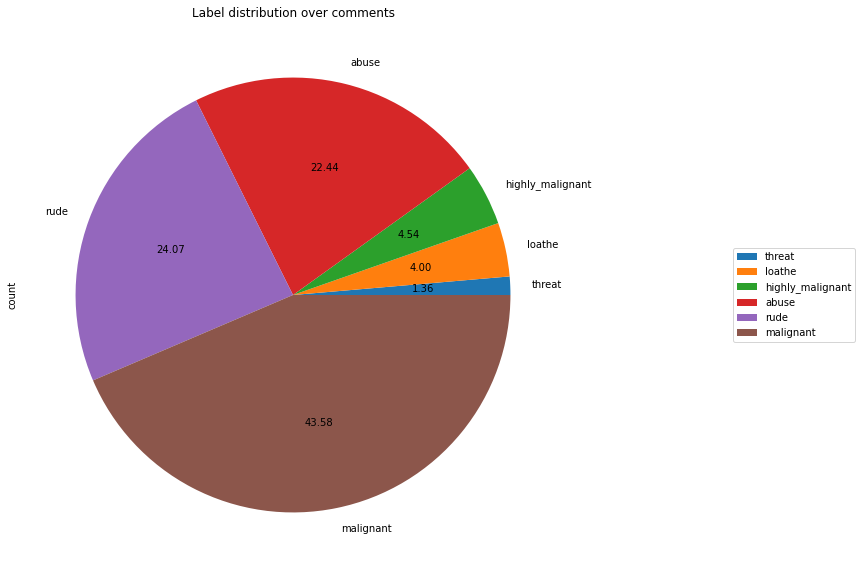

In [21]:
# Visualizing the label distribution of comments using pie chart

comments_labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
df_distribution = df[comments_labels].sum()\
                            .to_frame()\
                            .rename(columns={0: 'count'})\
                            .sort_values('count')

df_distribution.plot.pie(y = 'count', title = 'Label distribution over comments', autopct='%.2f', figsize = (15, 10))\
                            .legend(loc='center left', bbox_to_anchor=(1.3, 0.5))

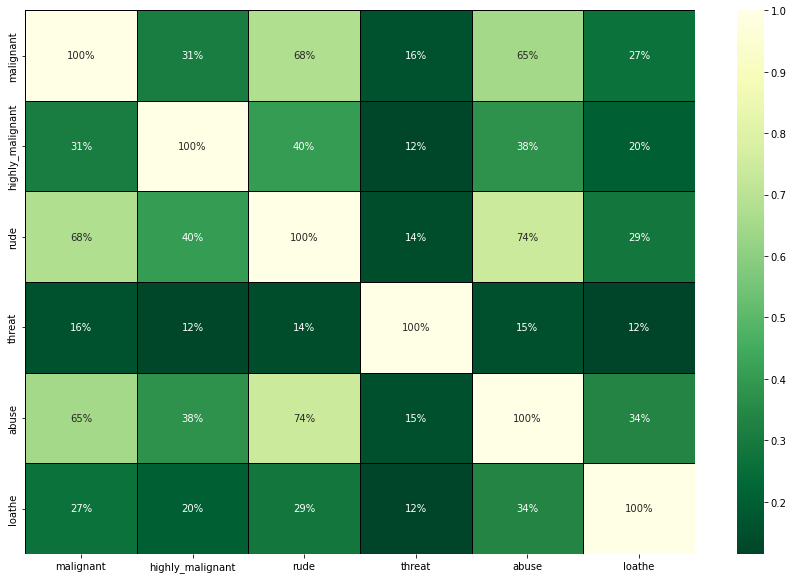

In [22]:
# Plotting heatmap for visualizing the correlation

plt.figure(figsize=(15, 10))
corr = df.corr() # corr() function provides the correlation value of each column
sns.heatmap(corr, linewidth=0.5, linecolor='black', fmt='.0%', cmap='YlGn_r', annot=True)
plt.show()

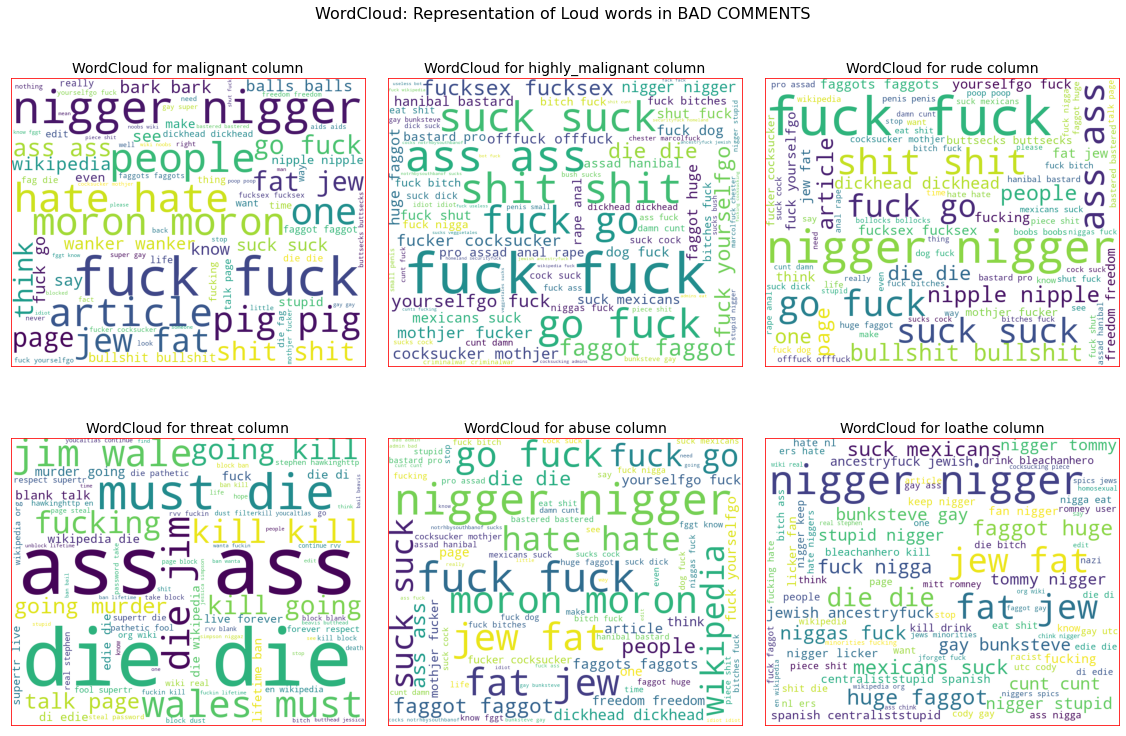

In [19]:
# WordCloud: Getting sense of loud words in each of the output labels.

cols = 3
rows = len(output_labels)//cols
if len(output_labels) % cols != 0:
    rows += 1
    
fig = plt.figure(figsize=(16,rows*cols*1.8))
fig.subplots_adjust(top=0.8, hspace=0.3)

p=1
for i in output_labels:
    word_cloud = WordCloud(height=650, width=800,
                           background_color="white",max_words=80).generate(' '.join(df1.comment_text[df[i]==1]))
    ax = fig.add_subplot(rows,cols,p)
    ax.imshow(word_cloud)
    ax.set_title(f"WordCloud for {i} column",fontsize=14)
    for spine in ax.spines.values():
        spine.set_edgecolor('r')
       
    ax.set_xticks([])
    ax.set_yticks([])
    p += 1

fig.suptitle("WordCloud: Representation of Loud words in BAD COMMENTS",fontsize=16)
fig.tight_layout(pad=2)
plt.show()

Observation:

- From wordcloud of malignant comments, it is clear that it mostly consists of words like fuck, nigger, moron, hate, suck ect.
- From wordcloud of highly_malignant comments, it is clear that it mostly consists of words like ass, fuck, bitch, shit, die, suck, faggot ect.
- From wordcloud of rude comments, it is clear that it mostly consists of words like nigger, ass, fuck, suck, bullshit, bitch etc.
- From wordcloud of threat comments, it is clear that it mostly consists of words like die, must die, kill, murder etc.
- From wordcloud of abuse comments, it is clear that it mostly consists of words like moron, nigger, fat, jew, bitch etc.
- From wordcloud of loathe comments, it is clear that it mostly consists of words like nigga, stupid, nigger, die, gay cunt etc.

In [19]:
# 1. Convert text to Vectors

# Converting text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(max_features=4000)
features = tfidf.fit_transform(df1.comment_text).toarray()

# Checking the shape of features
features.shape

(159571, 4000)

In [20]:
# 2. Seperating Input and Output Variables

# input variables
X = features

# output variables
Y = csr_matrix(df1[output_labels]).toarray()

# checking shapes of input and output variables to take care of data imbalance issue
print("Input Variable Shape:", X.shape)
print("Output Variable Shape:", Y.shape)

Input Variable Shape: (159571, 4000)
Output Variable Shape: (159571, 6)


### Classification Machine Learning Model building

In [21]:
# 3. Training and Testing Model on our train dataset

# Creating a function to train and test model
def build_models(models,x,y,test_size=0.33,random_state=42):
    # spliting train test data using train_test_split
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=test_size,random_state=random_state)
    
    # training models using BinaryRelevance of problem transform
    for i in tqdm.tqdm(models,desc="Building Models"):
        start_time = timeit.default_timer()
        
        sys.stdout.write("\n=======================================================================================\n")
        sys.stdout.write(f"Current Model in Progress: {i} ")
        sys.stdout.write("\n=======================================================================================\n")
        
        br_clf = BinaryRelevance(classifier=models[i]["name"],require_dense=[True,True])
        print("Training: ",br_clf)
        br_clf.fit(x_train,y_train)
        
        print("Testing: ")
        predict_y = br_clf.predict(x_test)
        
        ham_loss = hamming_loss(y_test,predict_y)
        sys.stdout.write(f"\n\tHamming Loss  : {ham_loss}")
                
        ac_score = accuracy_score(y_test,predict_y)
        sys.stdout.write(f"\n\tAccuracy Score: {ac_score}")
        
        cl_report = classification_report(y_test,predict_y)
        sys.stdout.write(f"\n{cl_report}")
        
        end_time = timeit.default_timer()
        sys.stdout.write(f"Completed in [{end_time-start_time} sec.]")
        
        models[i]["trained"] = br_clf
        models[i]["hamming_loss"] = ham_loss
        models[i]["accuracy_score"] = ac_score
        models[i]["classification_report"] = cl_report
        models[i]["predict_y"] = predict_y
        models[i]["time_taken"] = end_time - start_time
                      
        sys.stdout.write("\n=======================================================================================\n")
    
    models["x_train"] = x_train
    models["y_train"] = y_train
    models["x_test"] = x_test
    models["y_test"] = y_test
    
    return models

In [ ]:
# Preparing the list of models for classification purpose
models = {"GaussianNB": {"name": GaussianNB()},
          "MultinomialNB": {"name": MultinomialNB()},
          "Logistic Regression": {"name": LogisticRegression()},
          "Random Forest Classifier": {"name": RandomForestClassifier()},
          "Support Vector Classifier": {"name": LinearSVC(max_iter = 3000)},
          "Ada Boost Classifier": {"name": AdaBoostClassifier()},
          "K Nearest Neighbors Classifier": {"name": KNeighborsClassifier()},
          "Decision Tree Classifier": {"name": DecisionTreeClassifier()}
         }

# Taking one forth of the total data for training and testing purpose
half = len(df1)//4
trained_models = build_models(models,X[:half,:],Y[:half,:])

Building Models:   0%|          | 0/8 [00:03<?, ?it/s]


Current Model in Progress: GaussianNB 
Training:  BinaryRelevance(classifier=GaussianNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.18932776300797569
	Accuracy Score: 0.5214584124572731
              precision    recall  f1-score   support

           0       0.18      0.80      0.30      1281
           1       0.08      0.47      0.14       150
           2       0.12      0.72      0.21       724
           3       0.02      0.30      0.04        44
           4       0.12      0.67      0.20       650
           5       0.04      0.43      0.07       109

   micro avg       0.13      0.72      0.22      2958
   macro avg       0.09      0.56      0.16      2958
weighted avg       0.14      0.72      0.23      2958
 samples avg       0.05      0.07      0.06      2958
Completed in [95.87884349999996 sec.]

Current Model in Progress: MultinomialNB 
Training:  BinaryRelevance(classifier=MultinomialNB(), require_dense=[True, True])
Testing: 

	Hamming Loss  : 0.023800

### Hyperparameter Tuning

In [23]:
# Choosing Linear Support Vector Classifier model

fmod_param = {'estimator__penalty' : ['l1', 'l2'],
              'estimator__loss' : ['hinge', 'squared_hinge'],
              'estimator__multi_class' : ['ovr', 'crammer_singer'],
              'estimator__random_state' : [42, 72, 111]
             }
SVC = OneVsRestClassifier(LinearSVC())
GSCV = GridSearchCV(SVC, fmod_param, cv=3)
x_train,x_test,y_train,y_test = train_test_split(X[:half,:], Y[:half,:], test_size=0.30, random_state=42)
GSCV.fit(x_train,y_train)
GSCV.best_params_

{'estimator__loss': 'hinge',
 'estimator__multi_class': 'ovr',
 'estimator__penalty': 'l2',
 'estimator__random_state': 42}

In [24]:
Final_Model = OneVsRestClassifier(LinearSVC(loss='hinge', multi_class='ovr', penalty='l2', random_state=42))
Classifier = Final_Model.fit(x_train, y_train)
fmod_pred = Final_Model.predict(x_test)
fmod_acc = (accuracy_score(y_test, fmod_pred))*100
print("Accuracy score for the Best Model is:", fmod_acc)
h_loss = hamming_loss(y_test,fmod_pred)*100
print("Hamming loss for the Best Model is:", h_loss)

Accuracy score for the Best Model is: 91.4187834224599
Hamming loss for the Best Model is: 2.0457330659536543


### AUC ROC Curve for Final Model

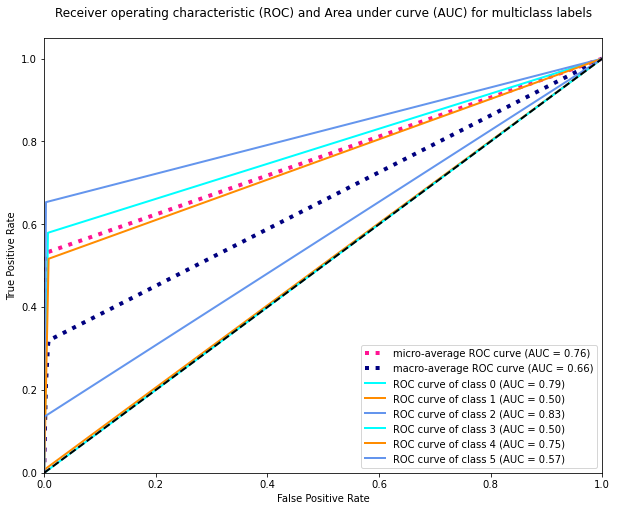

In [28]:
n_classes = y_test.shape[1]

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[:, i], fmod_pred[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), fmod_pred.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])

plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size

# First aggregate all false positive rates
all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))

# Then interpolate all ROC curves at this points
mean_tpr = np.zeros_like(all_fpr)
for i in range(n_classes):
    mean_tpr += interp(all_fpr, fpr[i], tpr[i])

# Finally average it and compute AUC
mean_tpr /= n_classes

fpr["macro"] = all_fpr
tpr["macro"] = mean_tpr
roc_auc["macro"] = auc(fpr["macro"], tpr["macro"])

# Plot all ROC curves
plt.figure()
plt.plot(
    fpr["micro"],
    tpr["micro"],
    label="micro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["micro"]),
    color="deeppink",
    linestyle=":",
    linewidth=4,
)

plt.plot(
    fpr["macro"],
    tpr["macro"],
    label="macro-average ROC curve (AUC = {0:0.2f})".format(roc_auc["macro"]),
    color="navy",
    linestyle=":",
    linewidth=4,
)

colors = cycle(["aqua", "darkorange", "cornflowerblue"])
for i, color in zip(range(n_classes), colors):
    plt.plot(
        fpr[i],
        tpr[i],
        color=color,
        lw=2,
        label="ROC curve of class {0} (AUC = {1:0.2f})".format(i, roc_auc[i]),
    )

plt.plot([0, 1], [0, 1], "k--", lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic (ROC) and Area under curve (AUC) for multiclass labels\n")
plt.legend(loc="lower right")
plt.show()

### Confusion Matrix for Final Model

In [29]:
print("Confusion matrix:\n\n", multilabel_confusion_matrix(y_test, fmod_pred))

Confusion matrix:

 [[[10720    73]
  [  494   681]]

 [[11831     2]
  [  134     1]]

 [[11274    36]
  [  228   430]]

 [[11929     1]
  [   38     0]]

 [[11282    90]
  [  288   308]]

 [[11870     2]
  [   83    13]]]


In [33]:
df.columns

Index(['id', 'comment_text', 'malignant', 'highly_malignant', 'rude', 'threat',
       'abuse', 'loathe'],
      dtype='object')

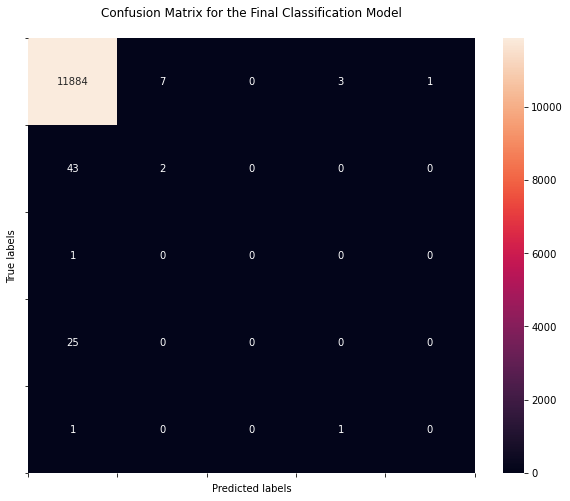

In [36]:
plt.rcParams["figure.figsize"] = (10,8) # used to change the output figure size
ax= plt.subplot()
cm = confusion_matrix(np.asarray(y_test).argmax(axis=1), np.asarray(fmod_pred).argmax(axis=1))
sns.heatmap(cm, annot=True, fmt='g', ax=ax);  # annot=True to annotate cells, ftm='g' to disable scientific notation

# title, labels and ticks
ax.set_title('Confusion Matrix for the Final Classification Model\n'); 
ax.set_xlabel('Predicted labels'); ax.set_ylabel('True labels'); 
loc = plticker.MultipleLocator()
ax.xaxis.set_major_locator(loc); ax.yaxis.set_major_locator(loc);
#ax.set_xticklabels(comments_labels); ax.set_yticklabels(comments_labels);
plt.xticks(rotation=90); plt.yticks(rotation=0);
plt.show()

### Model Saving or Serialization

In [39]:
# selecting the best model
best_model = trained_models['Support Vector Classifier']['trained']

# saving the best classification model
joblib.dump(best_model,'Malignant_comments_classifier.obj')

['Malignant_comments_classifier.obj']

### Preprocessing Pipeline for test dataframe

The following preprocessing pipeline is required to perform model prediction:

- Use the test dataset
- Remove null values if any
- Drop column id
- Convert comment text to lower case and replace '\n' with single space
- Keep only text data ie. a-z' and remove other data from comment text
- Remove stop words and punctuations
- Apply Stemming using SnowballStemmer
- Convert text to vectors using TfidfVectorizer
- Load saved or serialized best model
- Predict values and create a new CSV file

In [70]:
#load the test dataset
df_test=pd.read_csv('test.csv')

In [ ]:
# Remove null values
if df_test.isnull().sum()[1] != 0:
    df_test.dropna(inplace=True)
    
# Drop coulmn id
df_test.drop(columns=['id'],inplace=True)

# Convert comment text to lower case and replace '\n' with single space
df_test["comment_text"] = df_test.comment_text.str.lower()
df_test["comment_text"] = df_test.comment_text.str.replace('\n',' ')

# Keep only text data i.e., a-z' and remove other data from comment text.
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(regexp_tokenize(x,"[a-z']+")))

# Remove stopwords
df_test.comment_text = df_test.comment_text.apply(lambda x: ' '.join(word for word in x.split() if word not in stop_words).strip())

# Remove punctuations
df_test.comment_text = df_test.comment_text.str.replace("[^\w\d\s]","")

print(df_test.info(memory_usage="deep"))

# Convert text to vectors using TfidfVectorizer
tfidf = TfidfVectorizer(analyzer = 'word', max_features=4000)
test_features = tfidf.fit_transform(df_test.comment_text).toarray()

# Load saved or serialized model and predict
model_loaded = joblib.load('Malignant_comments_classifier.pkl')

# Make predictions and view the results
predict_test = model_loaded.predict(test_features)

# Saving predicted values into a CSV file
pd.DataFrame(predict_test.toarray()).to_csv('Predicted_test_output.csv')

In [ ]:
df2 = pd.read_csv('Predicted_test_output.csv')
df2.drop("Unnamed: 0", axis=1, inplace=True)
df2.rename({'0':'malignant', '1':'highly_malignant', '2':'rude', '3':'threat', '4':'abuse', '5':'loathe'}, 
           axis='columns', inplace=True)
df3=df_test.copy()
df = pd.concat([df3, df2], axis=1)
df

In [ ]:
df.to_csv('test_dataset_predictions.csv', index=False)

### Inference

Starting with univariate analysis, with the help of count plot it was found that dataset is imbalanced with having higher number of records for normal comments than bad comments (including malignant, highly malignant, rude, threat, abuse and loathe). Also, with the help of distribution plot for comments length it was found that after cleaning most of comments length decreases from range 0-1100 to 0-900. Moving further with wordcloud it was found that malignant comments consists of words like fuck, nigger, moron, hate, suck etc. highly_malignant comments consists of words like ass, fuck, bitch, shit, die, suck, faggot etc. rude comments consists of words like nigger, ass, fuck, suck, bullshit, bitch etc. threat comments consists of words like die, must die, kill, murder etc. abuse comments consists of words like moron, nigger, fat, jew, bitch etc. and loathe comments consists of words like nigga, stupid, nigger, die, gay, cunt etc.

### Problems faced while working in this project:

- More computational power was required as it took more than 2 hours
- Imbalanced dataset and bad comment texts
- Good parameters could not be obtained using hyperparameter tuning as time was consumed more

### Areas of improvement:

- Could be provided with a good dataset which doesnot take more time.
- Less time complexity
- Providing a proper balanced dataset with less errors.

My point of view from my project is that we need to use proper words which are respectful and also avoid using abusive, vulgar and worst words in social media. It can cause many problems which could affect our lives. Try to be polite, calm and composed while handling stress and negativity and one of the best solution is to avoid it and overcoming in a positive manner.